DATA LOADING AND INITIAL INSPECTION

In [31]:
#import dependent libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as tick

In [2]:
#Load the Data
df = pd.read_csv('purchase_data.csv')
df.head() #Display first 5 rows

,date,customer_id,product_category,payment_method,value [USD],time_on_site [Minutes],clicks_in_site,Unnamed: 7
0,20/11/2018,37077,505,credit,49.53,12.0,8,NaN
1,20/11/2018,59173,509,paypal,50.61,25.9,8,NaN
2,20/11/2018,41066,507,credit,85.99,34.9,11,NaN
3,20/11/2018,50741,506,credit,34.60,16.5,9,NaN
4,20/11/2018,53639,515,paypal,266.27,43.1,30,NaN


In [3]:
print(df.info()) #Check Data type and structure

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24999 entries, 0 to 24998
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   date                    24999 non-null  object 
 1   customer_id             24999 non-null  int64  
 2   product_category        24999 non-null  int64  
 3   payment_method          24999 non-null  object 
 4   value [USD]             24999 non-null  float64
 5   time_on_site [Minutes]  24999 non-null  float64
 6   clicks_in_site          24999 non-null  int64  
 7   Unnamed: 7              0 non-null      float64
dtypes: float64(3), int64(3), object(2)
memory usage: 1.5+ MB
None


In [4]:
df.describe()
df.shape

(24999, 8)

DATA CLEANING AND PREPARATION

In [5]:
# Convert the date column to datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce')

c:\Users\USER PC\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '20/11/2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\Users\USER PC\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '21/11/2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\Users\USER PC\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '22/11/2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\Users\USER PC\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '23/11/2018' in DD/MM/YYYY format. Provide format o

In [ ]:
#Delete the  unnecessary Column called Unnamed: 7
New_Data = df.drop('Unnamed: 7',axis='columns')
New_Data

,date,customer_id,product_category,payment_method,value [USD],time_on_site [Minutes],clicks_in_site
0,2018-11-20,37077,505,credit,49.53,12.0,8
1,2018-11-20,59173,509,paypal,50.61,25.9,8
2,2018-11-20,41066,507,credit,85.99,34.9,11
3,2018-11-20,50741,506,credit,34.60,16.5,9
4,2018-11-20,53639,515,paypal,266.27,43.1,30
...,...,...,...,...,...,...,...
24994,2018-11-29,33699,513,credit,55.89,45.1,7
24995,2018-11-29,38652,501,paypal,136.27,61.0,11
24996,2018-11-29,30222,504,paypal,427.45,52.8,45
24997,2018-11-29,30183,507,credit,981.81,58.2,76


In [7]:
# Add separate columns for month and year
New_Data['Day'] = New_Data['date'].dt.day  # Extract month
New_Data['month'] = New_Data['date'].dt.month  # Extract month
New_Data['year'] = New_Data['date'].dt.year    # Extract year

In [8]:
New_Data.head()

,date,customer_id,product_category,payment_method,value [USD],time_on_site [Minutes],clicks_in_site,Day,month,year
0,2018-11-20,37077,505,credit,49.53,12.0,8,20,11,2018
1,2018-11-20,59173,509,paypal,50.61,25.9,8,20,11,2018
2,2018-11-20,41066,507,credit,85.99,34.9,11,20,11,2018
3,2018-11-20,50741,506,credit,34.60,16.5,9,20,11,2018
4,2018-11-20,53639,515,paypal,266.27,43.1,30,20,11,2018


In [11]:
# Calculate monthly revenue and transaction count
Daily_summary = New_Data.groupby(['Day']).agg(
    Daily_revenue=('value [USD]', 'sum'),     # Sum of total price for revenue
    transaction_count=('date', 'count')         # Count of transactions
).reset_index()

# View the result
print(monthly_summary)

   Day  Daily_revenue  transaction_count
0   20      400931.17               2211
1   21      380325.39               2116
2   22      401496.13               2195
3   23     1884586.16               7292
4   24       63113.88                366
5   25      391050.31               2206
6   26      400089.83               2224
7   27      368068.34               2119
8   28      400497.18               2154
9   29      390857.44               2116


In [41]:
#To know the Average Amount of Revenue per day
#To know the Average  number of Transactions per day
Avg_Revenue = Daily_summary['Daily_revenue'].mean()
Avg_Trx = Daily_summary['transaction_count'].mean()
Avg_Trx = round(Avg_Trx)
print (f'The average total revenue gotten per day is:{Avg_Revenue}')
print (f'The average total number of transactions made per day is:{Avg_Trx}')


The average total revenue gotten per day is:508101.583
The average total number of transactions made per day is:2500


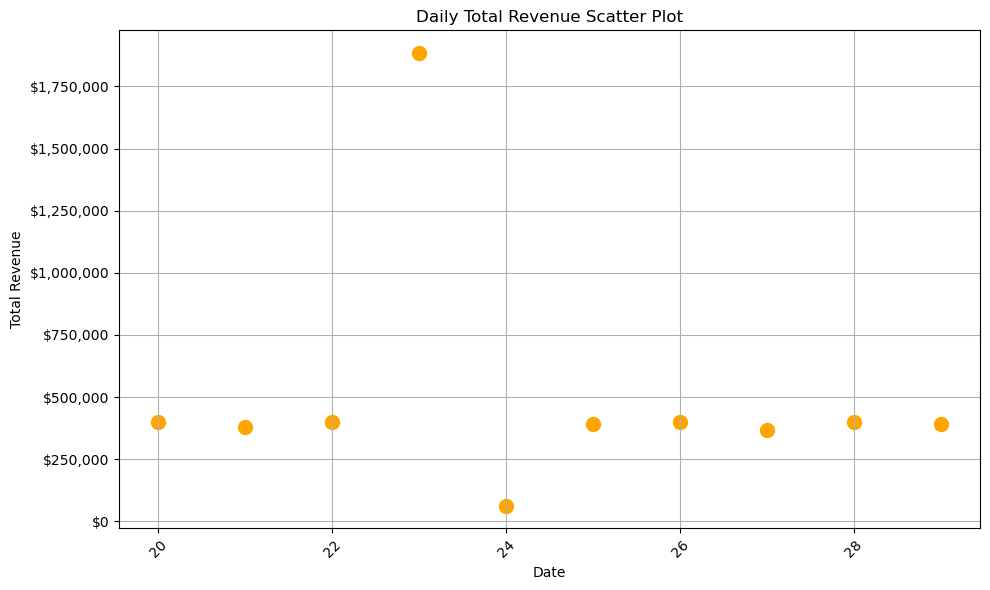

In [75]:
# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(Daily_summary['Day'], Daily_summary['Daily_revenue'], color='orange', s=100)  # s is the size of the points
#plt.axvline(x='22', color='g', linestyle='--', label='Sales Spike')
#plt.axvline(x='26', color='r', linestyle='--', label='Sales Drop')
plt.title('Daily Total Revenue Scatter Plot')
plt.xlabel('Date')
plt.ylabel('Total Revenue')

# Formatting the y-axis
plt.gca().yaxis.set_major_formatter(tick.StrMethodFormatter('${x:,.0f}'))  # Format as currency
plt.xticks(rotation=45)
plt.grid()

# Show the plot
plt.tight_layout()
plt.show()

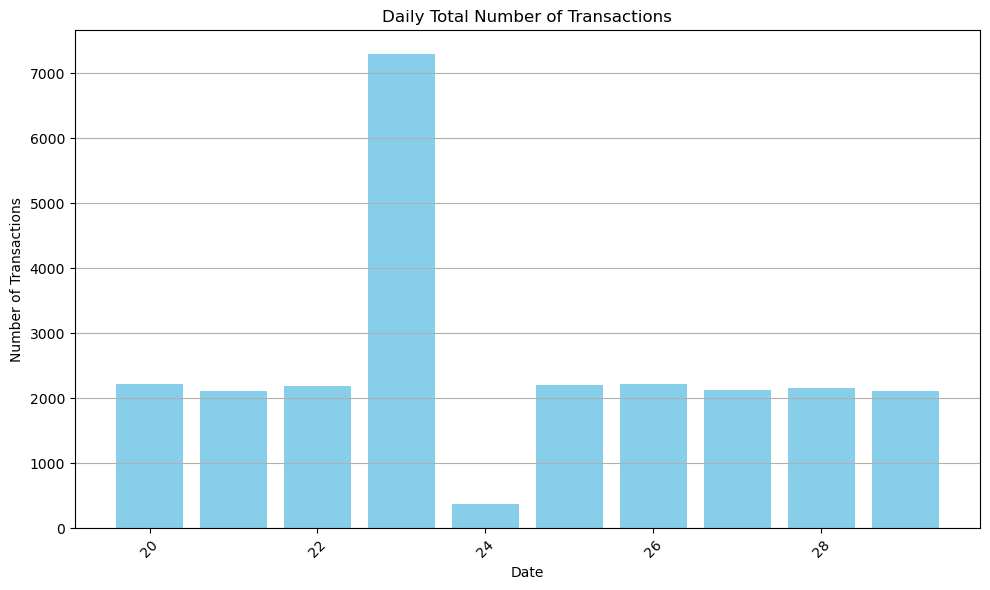

In [35]:
plt.figure(figsize=(10, 6))
plt.bar(Daily_summary['Day'], Daily_summary['transaction_count'], color='skyblue')
plt.title('Daily Total Number of Transactions')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.grid(axis='y')
# Show the plot
plt.tight_layout()
plt.show()

In [89]:
#Products Performance Summary

Product_performance = New_Data.groupby('product_category').agg(
    Total_Transactions = ('payment_method', 'count'),
    Total_Revenue = ('value [USD]', 'sum')
).reset_index()

print (Product_performance)

    product_category  Total_Transactions  Total_Revenue
0                501                1606      319681.33
1                502                1630      319000.43
2                503                1713      346344.13
3                504                1647      325769.58
4                505                2103      443451.26
5                506                1624      347301.76
6                507                1639      339178.47
7                508                1675      347132.42
8                509                1603      313093.63
9                510                1680      339045.70
10               511                1623      313385.53
11               512                1618      324100.02
12               513                1602      336304.34
13               514                1625      331395.05
14               515                1611      335832.18


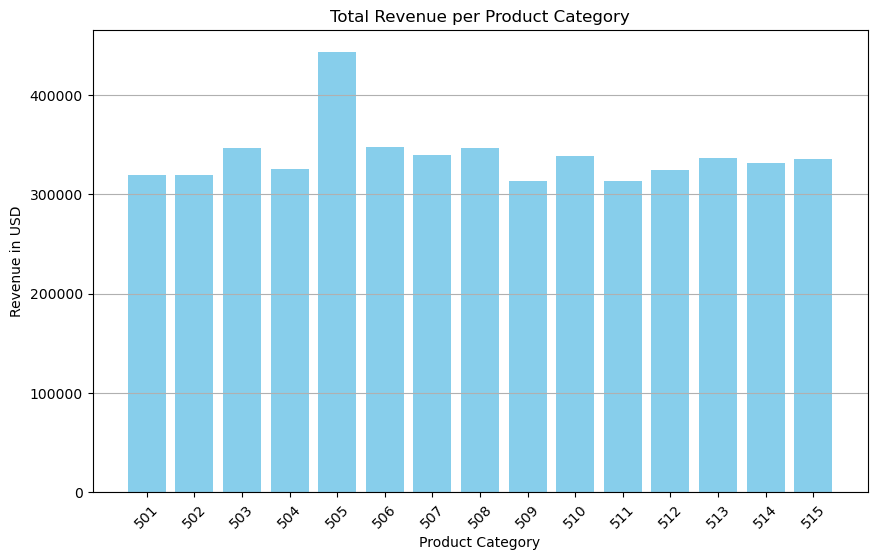

In [92]:
plt.figure(figsize=(10, 6))
plt.bar(Product_performance['product_category'], Product_performance['Total_Revenue'], color='skyblue')
plt.title('Total Revenue per Product Category')
plt.xlabel('Product Category')
plt.ylabel('Revenue in USD')
plt.xticks(Product_performance['product_category'], rotation=45)
plt.grid(axis='y')
# Show the plot
#plt.tight_layout()
plt.show()

In [ ]:
# Aggregate total revenue by category
total_revenue_per_category = df.groupby('product_category')['value [USD]'].sum().reset_index()

# Sort the categories by total revenue in descending order
top_performers = total_revenue_per_category.sort_values(by='value [USD]', ascending=False)

least_performers = total_revenue_per_category.sort_values(by='value [USD]', ascending=True)


# Get the top 5 performers
top_5_performers = top_performers.head(5)

#Get the least  performers
least_5_performers = least_performers.head(5)

# Display the top 5 performers
print(top_5_performers)
#Display the least 5 performers
print (least_5_performers)

   product_category  value [USD]
4               505    443451.26
5               506    347301.76
7               508    347132.42
2               503    346344.13
6               507    339178.47
    product_category  value [USD]
8                509    313093.63
10               511    313385.53
1                502    319000.43
0                501    319681.33
11               512    324100.02


In [165]:
# Create a pivot table for total daily revenue
#daily_revenue_pivot = df.pivot_table(index='product_category', columns='date', values='value [USD]', aggfunc='sum', fill_value=0)

# Display the pivot table
#print(daily_revenue_pivot)



# Create a pivot table for total daily revenue
percentage_increase_df = New_Data.pivot_table(index='date', columns='product_category', values='value [USD]', aggfunc='sum', fill_value=0)
# Reset the index to make 'date' a column
percentage_increase_df.reset_index(inplace=True)

print (percentage_increase_df)


product_category       date        501        502        503        504  \
0                2018-11-20   23729.16   27412.44   24141.39   24267.84   
1                2018-11-21   23166.28   23476.21   30037.05   29633.87   
2                2018-11-22   24861.42   27239.83   27567.79   23514.45   
3                2018-11-23  121303.21  120182.89  113697.23  115637.10   
4                2018-11-24    5159.42    3147.08    5714.75    4283.95   
5                2018-11-25   23534.57   20767.31   32700.97   25207.21   
6                2018-11-26   28331.89   25735.00   27755.32   23542.76   
7                2018-11-27   19902.56   21860.98   23910.33   18447.72   
8                2018-11-28   26094.08   23154.39   33420.43   29784.80   
9                2018-11-29   23598.74   26024.30   27398.87   31449.88   

product_category        505        506        507        508        509  \
0                  26985.27   28309.41   27584.76   27320.32   24606.41   
1                  23935

In [171]:
# Dates to remove
dates_to_remove = ['2018-11-23', '2018-11-24']

# Remove rows with specific dates
df_filtered = percentage_increase_df[~percentage_increase_df['date'].isin(pd.to_datetime(dates_to_remove))]

#print(df_filtered)
percentage_increase_df.columns

Index(['date',    501,    502,    503,    504,    505,    506,    507,    508,
          509,    510,    511,    512,    513,    514,    515],
      dtype='object', name='product_category')

In [174]:
#Delete the  date column
percentage_increase_df = percentage_increase_df.drop('date',axis='columns')
percentage_increase_df

product_category,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515
0,23729.16,27412.44,24141.39,24267.84,26985.27,28309.41,27584.76,27320.32,24606.41,23712.41,27523.85,24527.22,28600.04,31139.07,31071.58
1,23166.28,23476.21,30037.05,29633.87,23935.84,24230.64,26760.66,24173.96,25709.70,24642.15,20932.72,26334.60,22480.89,27148.63,27662.19
2,24861.42,27239.83,27567.79,23514.45,30578.08,32641.99,25476.88,27079.06,21992.54,25612.43,17746.48,33892.55,27532.71,28696.51,27063.41
3,121303.21,120182.89,113697.23,115637.10,242961.57,129656.64,114973.17,125744.76,115274.77,121948.86,111029.19,111447.49,110422.02,115737.69,114569.57
4,5159.42,3147.08,5714.75,4283.95,3692.61,3492.52,2713.32,3760.71,5395.37,5749.21,3346.56,3207.37,5566.64,2964.26,4920.11
5,23534.57,20767.31,32700.97,25207.21,25367.25,22389.12,30923.57,29205.43,24454.15,27583.11,25696.35,22517.17,31106.70,23298.30,26299.10
6,28331.89,25735.00,27755.32,23542.76,19857.64,24703.83,31858.81,25026.91,28459.38,29985.57,27802.81,24424.19,28946.54,28344.41,25314.77
7,19902.56,21860.98,23910.33,18447.72,26020.88,23491.98,25672.65,27147.05,23381.26,24939.46,29233.14,27103.97,30761.88,21458.53,24735.95
8,26094.08,23154.39,33420.43,29784.80,21491.63,31239.13,28156.42,26516.61,25026.39,26768.55,27254.89,28055.97,24886.61,24117.71,24529.57
9,23598.74,26024.30,27398.87,31449.88,22560.49,27146.50,25058.23,31157.61,18793.66,28103.95,22819.54,22589.49,26000.31,28489.94,29665.93


In [175]:
# Calculate percentage change for each product
percentage_change = percentage_increase_df.pct_change()

# Check for sustained growth (all percentage changes must be positive)
sustained_growth = (percentage_change > 0).all()

# List product IDs with sustained growth
sustained_growth_products = sustained_growth[sustained_growth].index.tolist()

print(sustained_growth)

product_category
501    False
502    False
503    False
504    False
505    False
506    False
507    False
508    False
509    False
510    False
511    False
512    False
513    False
514    False
515    False
dtype: bool


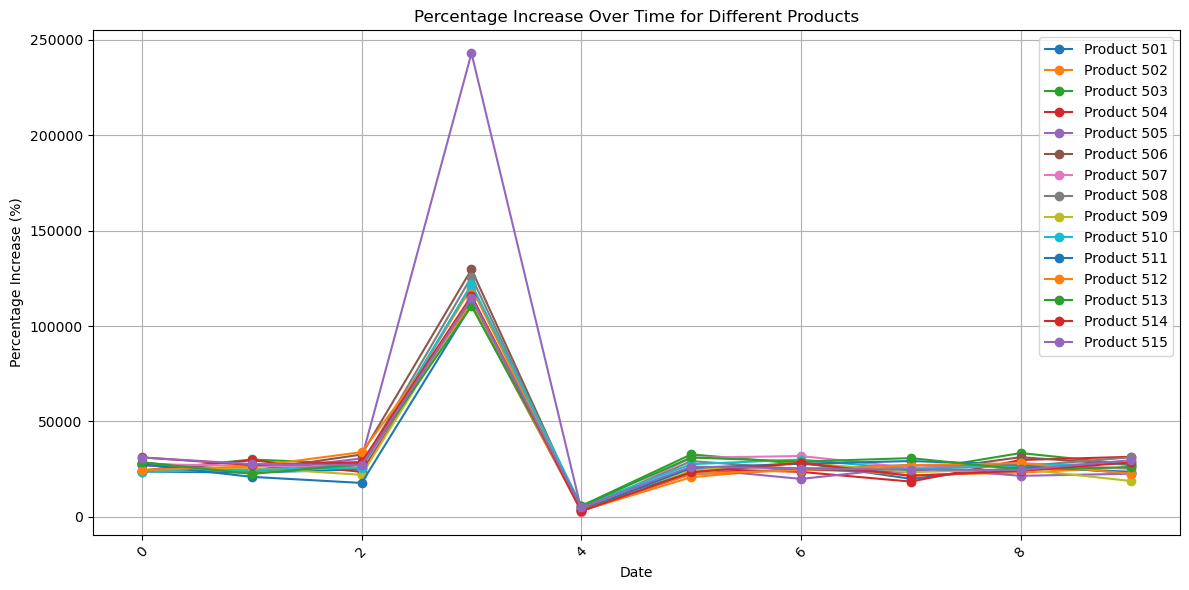

In [176]:
# Plotting
plt.figure(figsize=(12, 6))

# Plot each product's percentage increase
for product in percentage_increase_df.columns:  # Iterate through each product category
    plt.plot(percentage_increase_df.index, percentage_increase_df[product], marker='o', linestyle='-', label=f'Product {product}')

# Adding titles and labels
plt.title('Percentage Increase Over Time for Different Products')
plt.xlabel('Date')
plt.ylabel('Percentage Increase (%)')
plt.xticks(rotation=45)

# Show grid
plt.grid()

# Add legend
plt.legend()

# Show plot
plt.tight_layout()
plt.show()


In [ ]:
# Plotting
plt.figure(figsize=(12, 6))

# Plot each product's percentage increase
for product in percentage_increase_df.columns[1:]:  # Skip the 'date' column
    plt.plot(percentage_increase_df[''], percentage_increase_df[product], marker='o', linestyle='-', label=product)

# Adding titles and labels
plt.title('Percentage Increase Over Time for Different Products')
plt.xlabel('Date')
plt.ylabel('Percentage Increase (%)')
plt.xticks(rotation=45)

# Show grid
plt.grid()

# Add legend
plt.legend()

# Show plot
plt.tight_layout()
plt.show()


KeyError: 'product_category'

<Figure size 1200x600 with 0 Axes>

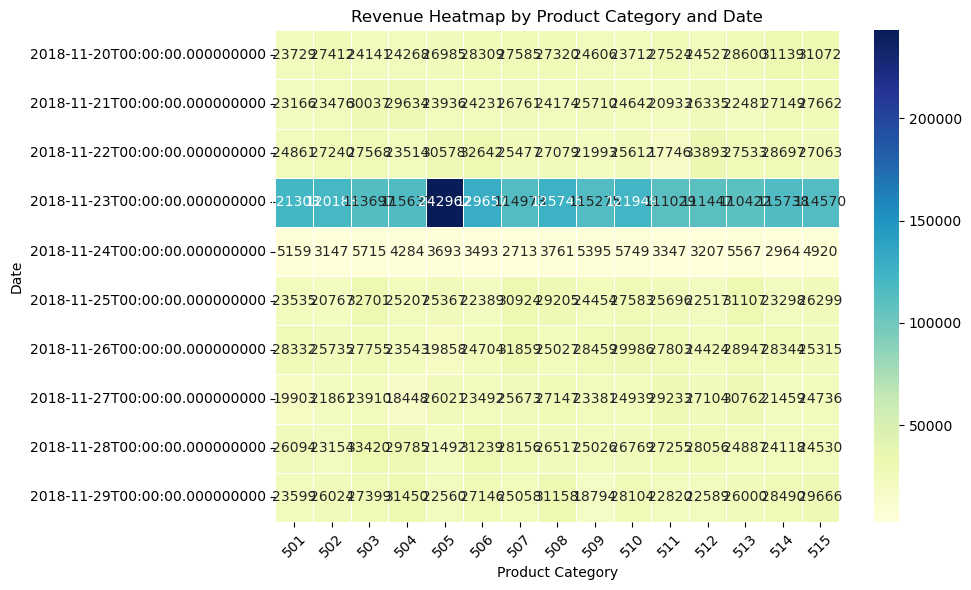

In [68]:
import seaborn as sns

# Plotting a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(Daily_summary_For_Poducts, annot=True, fmt=".0f", cmap="YlGnBu", linewidths=.5)
plt.title('Revenue Heatmap by Product Category and Date')
plt.xlabel('Product Category')
plt.ylabel('Date')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


In [115]:
# Dates to remove
dates_to_remove = ['2018-11-23']

# Remove rows with specific dates
df_filtered = New_Data[~New_Data['date'].isin(pd.to_datetime(dates_to_remove))]

print(df_filtered)


            date  customer_id  product_category payment_method  value [USD]  \
0     2018-11-20        37077               505         credit        49.53   
1     2018-11-20        59173               509         paypal        50.61   
2     2018-11-20        41066               507         credit        85.99   
3     2018-11-20        50741               506         credit        34.60   
4     2018-11-20        53639               515         paypal       266.27   
...          ...          ...               ...            ...          ...   
24994 2018-11-29        33699               513         credit        55.89   
24995 2018-11-29        38652               501         paypal       136.27   
24996 2018-11-29        30222               504         paypal       427.45   
24997 2018-11-29        30183               507         credit       981.81   
24998 2018-11-29        46662               505         credit         6.10   

       time_on_site [Minutes]  clicks_in_site  Day 

In [128]:
#Products Performance Summary

Daily_sales = New_Data.groupby('date').agg(
    Product_Category = ('product_category', 'count'),
    Total_Revenue = ('value [USD]', 'sum')
).reset_index()

print (Daily_sales)

        date  Product_Category  Total_Revenue
0 2018-11-20              2211      400931.17
1 2018-11-21              2116      380325.39
2 2018-11-22              2195      401496.13
3 2018-11-23              7292     1884586.16
4 2018-11-24               366       63113.88
5 2018-11-25              2206      391050.31
6 2018-11-26              2224      400089.83
7 2018-11-27              2119      368068.34
8 2018-11-28              2154      400497.18
9 2018-11-29              2116      390857.44


In [125]:
# Group by Product and Date, aggregating the Daily_revenue
daily_sales = New_Data.groupby(['product_category', 'date'])['value [USD]'].sum().reset_index()

# Sort values by Date for each product
daily_sales.sort_values(['product_category', 'date'], inplace=True)

# Calculate the percentage change in sales for each product
daily_sales['pct_change'] = daily_sales.groupby('product_category')['value [USD]'].pct_change()

# Define criteria for sustained growth (e.g., 3 consecutive positive changes)
daily_sales['sustained_increase'] = daily_sales['pct_change'] > 0
daily_sales['sustained_streak'] = daily_sales.groupby('product_category')['sustained_increase'].transform(lambda x: x.astype(int).rolling(3).sum())

# Filter products with at least 3 consecutive increases
sustained_products = daily_sales[daily_sales['sustained_streak'] >= 3]

# Display the products with sustained increases
#print(sustained_products)
daily_sales

,product_category,date,value [USD],pct_change,sustained_increase,sustained_streak
0,501,2018-11-20,23729.16,NaN,False,NaN
1,501,2018-11-21,23166.28,-0.023721,False,NaN
2,501,2018-11-22,24861.42,0.073173,True,1.0
3,501,2018-11-23,121303.21,3.879175,True,2.0
4,501,2018-11-24,5159.42,-0.957467,False,2.0
...,...,...,...,...,...,...
145,515,2018-11-25,26299.10,4.345226,True,2.0
146,515,2018-11-26,25314.77,-0.037428,False,1.0
147,515,2018-11-27,24735.95,-0.022865,False,1.0
148,515,2018-11-28,24529.57,-0.008343,False,0.0


In [117]:
# Aggregate total revenue by category
total_revenue_per_category = df_filtered.groupby('product_category')['value [USD]'].sum().reset_index()

# Find the product with the highest total revenue
highest_revenue_product = total_revenue_per_category.loc[total_revenue_per_category['value [USD]'].idxmax()]

# Check for consistent revenue growth
# Pivot the DataFrame to analyze revenue trends
revenue_trends = df.pivot_table(index='date', columns='product_category', values='value [USD]', aggfunc='sum', fill_value=0)

# Calculate the growth rate for each product category
growth_trends = revenue_trends.pct_change().fillna(0)

# Identify products with consistent growth (all growth rates > 0)
consistent_growth = growth_trends.loc[:, (growth_trends > 0).all()]

# Filter to find the highest revenue product with consistent growth
if not consistent_growth.empty:
    consistent_growth_products = consistent_growth.columns.intersection(total_revenue_per_category['Category'])
    highest_growth_product = total_revenue_per_category[total_revenue_per_category['Category'].isin(consistent_growth_products)]
    highest_growth_product = highest_growth_product.loc[highest_growth_product['Total Revenue'].idxmax()]
else:
    highest_growth_product = None

# Display results
print("Product with Highest Total Revenue:")
print(highest_revenue_product)

if highest_growth_product is not None:
    print("\nProduct with Highest Revenue and Consistent Growth:")
    print(highest_growth_product)
else:
    print("\nNo product shows consistent revenue growth.")

Product with Highest Total Revenue:
product_category       503.0
value [USD]         232646.9
Name: 2, dtype: float64

No product shows consistent revenue growth.


This is as result of the outlier present

In [ ]:
# Exponential Smoothing
df['Exponential_Smoothing'] = df['Daily'].ewm(alpha=0.3, adjust=False).mean()


CUSTOMER ANALYTICS